In [1]:
!git clone https://github.com/georgiosarvanitidis/geometric_ml.git

Cloning into 'geometric_ml'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 102 (delta 11), reused 40 (delta 8), pack-reused 59
Receiving objects: 100% (102/102), 348.02 KiB | 4.52 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00


In [3]:
cd geometric_ml/

/content/geometric_ml


[Initialize Graph] [Processed point: 0/30]
[COMB solver] [Failed: False] [Length: 5.17]


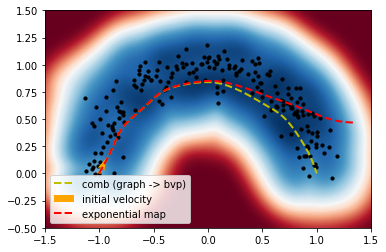

In [4]:
import numpy as np
from python.core import utils, manifolds, geodesics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

'''
In this example we construct a simple manifold and compute the geodesic curve between two points using several solvers.

:solver_bvp: uses the python scipy bvp5c solver.
:solver_fp: implements the method in
 
    "Fast and Robust Shortest Paths on Data Learned Riemannian Manifolds", 
        G. Arvanitidis, et. al., AISTATS 2019.
        
:solver_graph: a heuristic solver based on a graph and a cubic-spline
:solver_comb: a combination of two solvers, where the solution of the solver_2 is used to initialize solver_1 
'''

# Construct an artificial data set
data_params = {'N': 200, 'data_type': 1, 'sigma': 0.1}
data = utils.generate_data(data_params)
utils.my_plot(data, c='k', s=10)

# Construct a Riemannian metric from the data
manifold = manifolds.LocalDiagPCA(data=data, sigma=0.15, rho=1e-3)

# Plot the Riemannian volume element
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')




solver_bvp = geodesics.SolverBVP(NMax=1000, tol=1e-3)
N_nodes = 30
solver_graph = geodesics.SolverGraph(manifold, data=KMeans(n_clusters=N_nodes, n_init=30, max_iter=1000).fit(data).cluster_centers_,
                                     kNN_num=int(np.log(N_nodes)), tol=1e-3)
solver_comb = geodesics.SolverComb(solver_1=solver_bvp, solver_2=solver_graph)




c0 = utils.my_vector([-1, 0])
c1 = utils.my_vector([1, 0])

curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, c1)
geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')

plt.quiver(c0[0, 0], c0[1, 0], logmap_comb[0, 0], logmap_comb[1, 0], scale=100, color='orange', label='initial velocity')




curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, logmap_comb)

geodesics.plot_curve(curve_expmap_comb, c='red', linewidth=2, linestyle='--', label='exponential map')

plt.legend()


## Print(length geodesic)
print('[COMB solver] [Failed: ' + str(failed_comb) + '] [Length: ' + str(np.round(curve_length_comb, 2)) + ']')


The solution of bounded diff equation is not the best one because with the velocity yield by the program, when we run exponential map we do not converge to the desired point

In [5]:
### Estimate the error and confidence interval between c1 and c1 with the exponential map (1000 simulations )

[Initialize Graph] [Processed point: 0/30]
[[2.04052051]
 [4.76178217]]
[COMB solver] [Failed: False] [Length: 5.18]


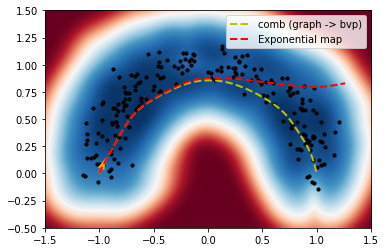

In [6]:
import numpy as np
from python.core import utils, manifolds, geodesics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

'''
In this example we construct a simple manifold and compute the geodesic curve between two points using several solvers.

:solver_bvp: uses the python scipy bvp5c solver.
:solver_fp: implements the method in
 
    "Fast and Robust Shortest Paths on Data Learned Riemannian Manifolds", 
        G. Arvanitidis, et. al., AISTATS 2019.
        
:solver_graph: a heuristic solver based on a graph and a cubic-spline
:solver_comb: a combination of two solvers, where the solution of the solver_2 is used to initialize solver_1 
'''

# Construct an artificial data set
data_params = {'N': 200, 'data_type': 1, 'sigma': 0.1}
data = utils.generate_data(data_params)
utils.my_plot(data, c='k', s=10)

# Construct a Riemannian metric from the data
manifold = manifolds.LocalDiagPCA(data=data, sigma=0.15, rho=1e-3)

# Plot the Riemannian volume element
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')




solver_bvp = geodesics.SolverBVP(NMax=1000, tol=1e-1)
N_nodes = 30
solver_graph = geodesics.SolverGraph(manifold, data=KMeans(n_clusters=N_nodes, n_init=30, max_iter=1000).fit(data).cluster_centers_,
                                     kNN_num=int(np.log(N_nodes)), tol=1e-2)
solver_comb = geodesics.SolverComb(solver_1=solver_bvp, solver_2=solver_graph)




c0 = utils.my_vector([-1, 0])
c1 = utils.my_vector([1, 0])

curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, c1)
geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')
#
plt.quiver(c0[0, 0], c0[1, 0], logmap_comb[0, 0], logmap_comb[1, 0], scale=100, color='orange')



print(logmap_comb)

curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, logmap_comb)

geodesics.plot_curve(curve_expmap_comb, c='red', linewidth=2, linestyle='--', label='Exponential map')

plt.legend()


## Print(length geodesic)
print('[COMB solver] [Failed: ' + str(failed_comb) + '] [Length: ' + str(np.round(curve_length_comb, 2)) + ']')


1)same experiment gives two different results for expmap : due to the variation in intial value : [[1.31368754]
 [4.82139949]] (correct) and  
 
[[1.28654298]
 [4.95597636]] 
 
 we have the following differnce fig 1 
 
2) There is differece= ce between two methods : the yellow one smooths the curve along the trajectory to meet the end points 

but exponential map is fully determined by he intitial elocity and starting point 
 

3) the initial velocity given by the second method is not perfect. Because with this velocity the exponential map does not end at (1,0)

## Finding optimal initial velocity 

In [7]:
## function to optimise 

def exp (v0, x0, manifold, xf ) : 
    
    curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, x0, v0)
    return np.linalg.norm(curve_expmap_comb(1)[0] - xf)

    

In [8]:
from scipy import optimize

In [9]:
def exp_fsolve (v0,x0, manifold, xf) :
    curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, x0, v0)
    
    return np.abs(curve_expmap_comb(1)[0] - xf).reshape(-1)
    

In [10]:
def derive_exp (v0, x0, manifold, xf):
    
    eps = 1e-4
    
    grad = np.zeros(v0.shape[0])
    exp_v0  = exp(v0 ,x0, manifold, xf )
    
    
    infinitesimal = eps*np.eye(v0.shape[0]) 
    v0_h = v0 + infinitesimal

    for i in range(len(v0)) : 
        grad[i] = 1/eps*(exp(v0_h[:,i].reshape(-1,1) ,x0, manifold, xf ) - exp_v0)
        
    return grad

In [11]:
def find_initial_velocity (v0, x0, manifold, xf, tol = 1e-3,method = 'Newton'):
    

    if method == 'Newton':
        
        return optimize.newton(exp, v0, tol=tol,  args = (x0, manifold, xf) )
    
    if method == 'fsolve':
        return optimize.fsolve(exp_fsolve, v0, args =(x0, manifold, xf),xtol = 1e-4 )
    
    return optimize.minimize (exp, v0, tol = tol, args = (x0, manifold, xf), method = 'BFGS')
    
    
    
    

In [12]:
res  = find_initial_velocity (logmap_comb, c0, manifold,c1, tol = 1e-4, method = 'll')
# res = res.reshape((-1,1))
print(res)
res = res.x.reshape((-1,1))

<ipython-input-11-067ed2e7455c>:11: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  return optimize.minimize (exp, v0, tol = tol, args = (x0, manifold, xf), method = 'BFGS')


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 5.732342884913437e-05
        x: [ 2.056e+00  4.763e+00]
      nit: 6
      jac: [-2.922e+01  1.277e+01]
 hess_inv: [[ 2.058e-03  4.853e-03]
            [ 4.853e-03  1.144e-02]]
     nfev: 138
     njev: 42


In [13]:
logmap_comb

array([[2.04052051],
       [4.76178217]])

In [14]:
res

array([[2.05598485],
       [4.76263277]])

In [15]:
exp_fsolve (res,c0, manifold, c1)

array([2.21204291e-05, 5.28834767e-05])

In [16]:
res

array([[2.05598485],
       [4.76263277]])

In [17]:
derive_exp (np.array([[4],[2]]), c0, manifold, c1)

array([-0.01689778, -0.06481811])

In [18]:
res  = find_initial_velocity (np.array([[2],[3]]), c0, manifold,c1 , tol = 1e-4, method = 'ff')
# res = res.reshape((-1,1))
print(res)
res = res.x.reshape((-1,1))

<ipython-input-11-067ed2e7455c>:11: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  return optimize.minimize (exp, v0, tol = tol, args = (x0, manifold, xf), method = 'BFGS')


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 6.201053702131697e-05
        x: [ 2.056e+00  4.763e+00]
      nit: 13
      jac: [-9.640e+01  4.145e+01]
 hess_inv: [[ 1.565e-04  3.700e-04]
            [ 3.700e-04  8.745e-04]]
     nfev: 266
     njev: 85


In [19]:
res

array([[2.05604275],
       [4.76276881]])

In [20]:
exp(res, c0, manifold,c1, )

6.201053702131697e-05

In [21]:
curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)


In [22]:
curve_expmap_comb(1)[0]

array([[1.00005296e+00],
       [3.22549203e-05]])

In [23]:
res 

array([[2.05604275],
       [4.76276881]])

In [24]:
logmap_comb

array([[2.04052051],
       [4.76178217]])

In [25]:
curve_expmap_comb((1))

(array([[1.00005296e+00],
        [3.22549203e-05]]), array([[ 0.51786611],
        [-2.53753292]]))

In [26]:
curve_comb(1)

(array([[1.00000000e+00],
        [2.60208521e-18]]), array([[ 0.51790829],
        [-2.53904126]]))

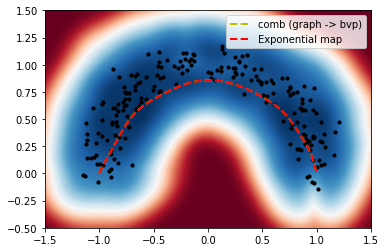

In [27]:
utils.my_plot(data, c='k', s=10)
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')
geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')
geodesics.plot_curve(curve_expmap_comb, c='red', linewidth=2, linestyle='--', label='Exponential map')
plt.legend()

In [28]:
def max_relative_error (curve_expmap_comb, curve_comb) :
    ponctual_error = curve_expmap_comb(np.linspace(0,1,20))[0] / curve_comb(np.linspace(0,1,20))[0] -1
    return np.max( ponctual_error ,axis = 1)

In [29]:
max_relative_error (curve_expmap_comb, curve_comb)

array([1.24383870e-02, 1.23957971e+13])

Here the exponential map and the other method coincide : sup (relative error (t)) < (1e-3,1e-3)

In [30]:
res

array([[2.05604275],
       [4.76276881]])

In [31]:
logmap_comb

array([[2.04052051],
       [4.76178217]])

In [32]:
relative_velocity = logmap_comb / res - 1 

In [33]:
relative_velocity

array([[-0.00754957],
       [-0.00020716]])

In [34]:
curve_expmap_comb(1)

(array([[1.00005296e+00],
        [3.22549203e-05]]), array([[ 0.51786611],
        [-2.53753292]]))

In [36]:
#np.linalg.norm(curve_expmap_comb_res(1) [0]- curve_expmap_comb(1)[0])

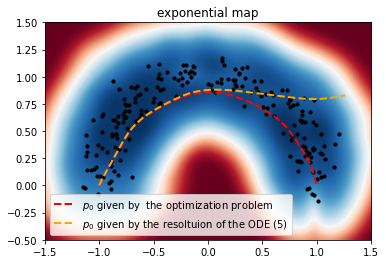

In [37]:
utils.my_plot(data, c='k', s=10)
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')
# geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')

curve_expmap_comb_res, failed_expmap_comb = geodesics.expmap(manifold, c0, res)

geodesics.plot_curve(curve_expmap_comb_res, c='red', linewidth=2, linestyle='--', label=r'$p_0$ given by  the optimization problem ')

curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, logmap_comb)

geodesics.plot_curve(curve_expmap_comb, c='orange', linewidth=2, linestyle='--', label=r'$p_0$ given by the resoltuion of the ODE (5)')

plt.title ('exponential map')

plt.legend()

The exponential map is toooo sensitive to the initial v0 

## BFSG so strong even for intiail guesses random 

<ipython-input-11-067ed2e7455c>:11: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  return optimize.minimize (exp, v0, tol = tol, args = (x0, manifold, xf), method = 'BFGS')


[[0.]
 [0.]]


/content/geometric_ml/python/core/geodesics.py:132: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  curve_length_eval = integrate.quad(lambda t: local_length(manifold, curve, t), a, b, epsabs=tol, limit=limit)  # , number of subintervals


[[15.66894704]
 [12.97153061]]
[[15.67061236]
 [12.9709026 ]]
[[15.6686669 ]
 [12.97168348]]
[[15.66912019]
 [12.97141887]]


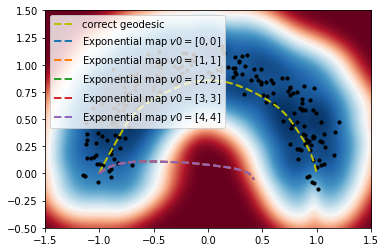

In [38]:
utils.my_plot(data, c='k', s=10)
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')
geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='correct geodesic')

for i in range(5):
    
    v0 = np.array([[i],[i]])
    res  = find_initial_velocity (v0, c0, manifold,c1 , tol = 1e-5, method = 'BFGS')
    res = res.x.reshape((-1,1))
    curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)
    print(res)

    geodesics.plot_curve(curve_expmap_comb, linewidth=2, linestyle='--', label=r'Exponential map $v0 = [{},{}]$'.format(i,i))
    plt.legend()


sometimes converges to another minimum 

### Sensitivity of BFSG

correct velocity [[2.16283185]
 [5.04234627]]
[[0.]
 [0.]]


<ipython-input-11-067ed2e7455c>:11: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  return optimize.minimize (exp, v0, tol = tol, args = (x0, manifold, xf), method = 'BFGS')


[[22.30853009]
 [11.51076012]]
[[22.3109446 ]
 [11.51009487]]
[[22.31177772]
 [11.5101517 ]]
[[22.31091442]
 [11.50963862]]


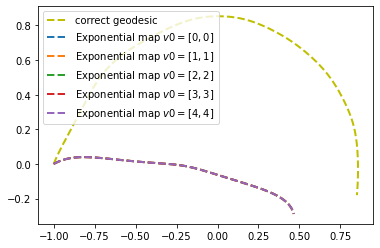

In [39]:
temp_c1 = c1  + np.random.normal (size = c1.shape)*0.5
curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, temp_c1)

geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='correct geodesic')

print('correct velocity', logmap_comb)
for i in range(5):
    
    v0 = np.array([[i],[i]])
    res  = find_initial_velocity (v0, c0, manifold,temp_c1 , tol = 1e-4, method = 'ff')
#     res = res.reshape((-1,1))
    res = res.x.reshape((-1,1))
    curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)
    print(res)

    geodesics.plot_curve(curve_expmap_comb, linewidth=2, linestyle='--', label=r'Exponential map $v0 = [{},{}]$'.format(i,i))
    plt.legend()


## Impact of first guess  5Too sensitive to the first guess . not stable

/content/geometric_ml/python/core/geodesics.py:132: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  curve_length_eval = integrate.quad(lambda t: local_length(manifold, curve, t), a, b, epsabs=tol, limit=limit)  # , number of subintervals
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[[22.53643346]
 [11.53321814]]
[[16.39899818]
 [12.65043252]]
[[16.85576522]
 [12.462527  ]]
[[16.8897635 ]
 [12.49635231]]
[[17.72615684]
 [12.18854603]]


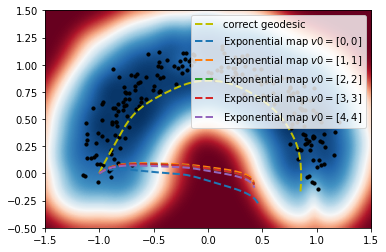

In [40]:
utils.my_plot(data, c='k', s=10)
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')
geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='correct geodesic')

for i in range(5):
    
    v0 = np.array([[i],[i]])
    res  = find_initial_velocity (v0, c0, manifold,c1 , tol = 1e-5, method = 'fsolve')
    res = res.reshape((-1,1))
    curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)
    print(res)

    geodesics.plot_curve(curve_expmap_comb, linewidth=2, linestyle='--', label=r'Exponential map $v0 = [{},{}]$'.format(i,i))
    plt.legend()


## Noising solution  (takie a good guess and change endpoint)

/content/geometric_ml/python/core/geodesics.py:132: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  curve_length_eval = integrate.quad(lambda t: local_length(manifold, curve, t), a, b, epsabs=tol, limit=limit)  # , number of subintervals


correct velocity [[ 5.31213818]
 [12.39952436]]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[[51.61454277]
 [13.57037517]]
[[48.47005822]
 [13.8970424 ]]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[[43.13957091]
 [12.42618812]]
[[51.66860186]
 [13.64925396]]
[[49.37352168]
 [13.13101369]]


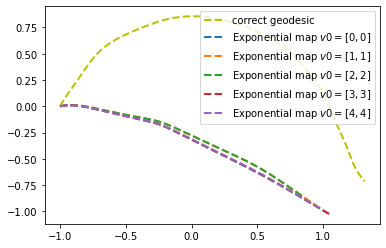

In [41]:
temp_c1 = c1  + np.random.normal (size = c1.shape)*0.5
curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, temp_c1)

geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='correct geodesic')

print('correct velocity', logmap_comb)
for i in range(5):
    
    v0 = np.array([[i],[i]])
    res  = find_initial_velocity (v0, c0, manifold,temp_c1 , tol = 1e-5, method = 'fsolve')
    res = res.reshape((-1,1))
    curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)
    print(res)

    geodesics.plot_curve(curve_expmap_comb, linewidth=2, linestyle='--', label=r'Exponential map $v0 = [{},{}]$'.format(i,i))
    plt.legend()


## Try neural network

1) tried simple network with one entry (final position) and one output with one hidden layer. (and more)

2) try to somehow include the whole trajectory each time 

In [42]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [43]:
class NN(nn.Module):
    
    def __init__(self, n_neurons = 10, input_dim = 2, output_dim = 2):
        
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_dim, n_neurons)
        self.fc2 = nn.Linear(n_neurons, output_dim)
#         self.fc2 = nn.Linear(n_neurons, n_neurons)
#         self.fc3 = nn.Linear(n_neurons, output_dim) 
    
    def forward(self, x):
        hidden = F.relu(self.fc1(x))
#         hidden = F.softplus (self.fc2(hidden))
        
        return F.softplus(self.fc2(hidden))
        

In [44]:
def train (model,optimizer,num_epochs , batch_size = 32):
    
    model.train(True)

    # Start training
    
    train_loss = []
    for epoch in range(num_epochs):
        
        v0 = np.random.rand(2,1)*6
        curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, v0)
        final =  curve_expmap_comb(1)[0]
        v0 = torch.from_numpy(v0).type(torch.FloatTensor).to(device).squeeze()
        batch_loss = []
        
        
    
        for i in range(batch_size):
            
            
            
#             v0 = np.random.rand(2,1)*4
# #             print(v0)
#             curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, v0)
#             final =  curve_expmap_comb(1)[0]
            
            
        
        # Forward pass
            x = torch.from_numpy(final).type(torch.FloatTensor).to(device).squeeze()[None,:]
            predicted_v0 = model(x).squeeze()
        
        # loss
#             v0 = torch.from_numpy(v0).type(torch.FloatTensor).to(device).squeeze()
            loss = torch.norm(predicted_v0- v0)
        
        # Backprop and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            if (i+1) % 10 == 0:
                print ("Epoch[{}/{}], Step [{}/{}], Loss: {:.4f}" 
                       .format(epoch+1, num_epochs, i+1, (batch_size), loss.item()))
            batch_loss.append(loss.item())
        train_loss.append(np.mean(batch_loss))
    
    return train_loss
        

In [45]:
num_epochs = 100
learning_rate = 1e-2
model = NN(n_neurons = 20).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [46]:
loss_list = train(model,optimizer,num_epochs*15 )

Epoch[1/1500], Step [10/32], Loss: 4.3297
Epoch[1/1500], Step [20/32], Loss: 3.6810
Epoch[1/1500], Step [30/32], Loss: 2.5947
Epoch[2/1500], Step [10/32], Loss: 0.5596
Epoch[2/1500], Step [20/32], Loss: 0.3239
Epoch[2/1500], Step [30/32], Loss: 0.1546
Epoch[3/1500], Step [10/32], Loss: 0.9698
Epoch[3/1500], Step [20/32], Loss: 0.2223
Epoch[3/1500], Step [30/32], Loss: 0.1679
Epoch[4/1500], Step [10/32], Loss: 0.8505
Epoch[4/1500], Step [20/32], Loss: 0.2590
Epoch[4/1500], Step [30/32], Loss: 0.1872
Epoch[5/1500], Step [10/32], Loss: 0.7094
Epoch[5/1500], Step [20/32], Loss: 0.3579
Epoch[5/1500], Step [30/32], Loss: 0.0785
Epoch[6/1500], Step [10/32], Loss: 0.9765
Epoch[6/1500], Step [20/32], Loss: 0.4345
Epoch[6/1500], Step [30/32], Loss: 0.2450
Epoch[7/1500], Step [10/32], Loss: 3.0935
Epoch[7/1500], Step [20/32], Loss: 1.9888
Epoch[7/1500], Step [30/32], Loss: 0.4275
Epoch[8/1500], Step [10/32], Loss: 1.3616
Epoch[8/1500], Step [20/32], Loss: 0.2823
Epoch[8/1500], Step [30/32], Loss:

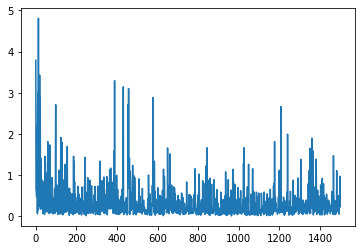

In [48]:
plt.plot (loss_list)

In [49]:
res = model(torch.tensor(c1).reshape(-1).type(torch.FloatTensor)).cpu().detach().numpy().reshape((-1,1))

In [50]:
res

array([[9.721672],
       [5.88735 ]], dtype=float32)

In [51]:
# curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, np.array([[[0.63970687],[5.02713971]]]))
curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)

In [52]:
curve_expmap_comb(1)[0]

array([[ 0.04043444],
       [-0.02283473]])

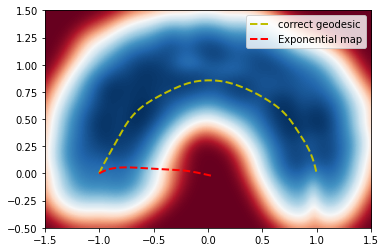

In [53]:
curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, c1)

geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='correct geodesic')
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')
# geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')
geodesics.plot_curve(curve_expmap_comb, c='red', linewidth=2, linestyle='--', label='Exponential map')
plt.legend()

## Exploit whole trajectory 

In [54]:
def get_trajectory (curve_exmap, T = 50) :
    return curve_expmap_comb(np.linspace(0,1,T))
    
    
    

In [55]:
def train_trajectory (model,optimizer,num_epochs , batch_size = 32, decay = 1):
    
    model.train(True)

    # Start training
    
    train_loss = []
    
    for epoch in range(num_epochs):
        
        v0 = np.random.rand(2,1)*6
        curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, v0)
        final =  curve_expmap_comb(1)[0]
        v0 = torch.from_numpy(v0).type(torch.FloatTensor).to(device).squeeze()
        batch_loss = 0
        
        
      
        positions, velocities = get_trajectory (curve_expmap_comb, T = batch_size) 
        velocities = torch.from_numpy (velocities).type(torch.FloatTensor).to(device)
        
      
        x = torch.from_numpy(final).type(torch.FloatTensor).to(device).squeeze()[None,:]
        
        for i in range(batch_size):
            
            
        # Forward pass
            predicted_v0 = model(x).squeeze()
        
        # loss
            final_velocity = velocities[:,-i-1]
            batch_loss += decay**(batch_size - 1 -i)*torch.norm(predicted_v0- final_velocity)
            
        # reloop
            x = predicted_v0
        
        
        
        # Backprop and optimize
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
        
      
        print ("Epoch[{}/{}], Loss: {:.4f}" 
                       .format(epoch+1, num_epochs, batch_loss.item()))
           
        
        train_loss.append(batch_loss)
    
    return train_loss
        

In [56]:
num_epochs = 200
learning_rate = 1e-3
batch_size = 32
model = NN(n_neurons = 20).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
# optimizer.param_groups[0]['lr'] *=10

In [58]:
loss = train_trajectory (model,optimizer,num_epochs , batch_size = batch_size, decay = 1 )

Epoch[1/200], Loss: 39.3210
Epoch[2/200], Loss: 39.2868
Epoch[3/200], Loss: 39.0720
Epoch[4/200], Loss: 39.0972
Epoch[5/200], Loss: 38.9855
Epoch[6/200], Loss: 38.9095
Epoch[7/200], Loss: 38.7955
Epoch[8/200], Loss: 38.7131
Epoch[9/200], Loss: 38.6244
Epoch[10/200], Loss: 38.5276
Epoch[11/200], Loss: 38.4345
Epoch[12/200], Loss: 38.3244
Epoch[13/200], Loss: 38.2321
Epoch[14/200], Loss: 38.1537
Epoch[15/200], Loss: 38.0448
Epoch[16/200], Loss: 37.9409
Epoch[17/200], Loss: 37.8815
Epoch[18/200], Loss: 37.7675
Epoch[19/200], Loss: 37.6942
Epoch[20/200], Loss: 37.6243
Epoch[21/200], Loss: 37.4042
Epoch[22/200], Loss: 37.4556
Epoch[23/200], Loss: 37.2480
Epoch[24/200], Loss: 37.3053
Epoch[25/200], Loss: 37.2215
Epoch[26/200], Loss: 37.1179
Epoch[27/200], Loss: 37.0536
Epoch[28/200], Loss: 36.9877
Epoch[29/200], Loss: 36.8996
Epoch[30/200], Loss: 36.8062
Epoch[31/200], Loss: 36.7405
Epoch[32/200], Loss: 36.6620
Epoch[33/200], Loss: 36.4568
Epoch[34/200], Loss: 36.3666
Epoch[35/200], Loss: 36

list

In [62]:
plt.plot(loss)

In [63]:
x = torch.tensor(c1).reshape(-1).type(torch.FloatTensor)
for i in range(batch_size):
            
            
        # Forward pass
            res = model(x).squeeze()
            x = res

In [64]:
res =res.cpu().detach().numpy().reshape((-1,1))

In [65]:
res

array([[0.5949915 ],
       [0.22374155]], dtype=float32)

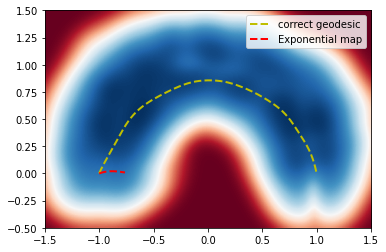

In [66]:
# curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, np.array([[[0.63970687],[5.02713971]]]))
curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)


curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, c1)

geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='correct geodesic')
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')
# geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')
geodesics.plot_curve(curve_expmap_comb, c='red', linewidth=2, linestyle='--', label='Exponential map')
plt.legend()

## Sklearn knearest neighbour regressor 

In [67]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5, weights = 'distance')

In [68]:
N = 300
V00 = [np.random.rand(2,1)*6 for _ in range(N)] + [ np.array([[1.11914141],
       [4.96595145]])]

Text(0.5, 1.0, 'exponential map for different initial values')

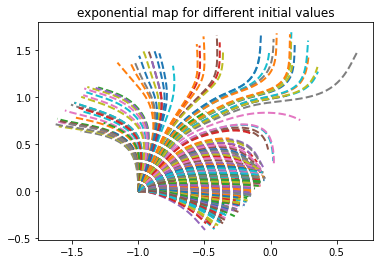

In [69]:
final_points = []
for i in range(N) :
    
    curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, V00[i])
    final =  curve_expmap_comb(1)[0]
    final_points.append(final)
    geodesics.plot_curve(curve_expmap_comb, linewidth=2, linestyle='--')

curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, V00[-1])
final =  curve_expmap_comb(1)[0]
final_points.append(final)
geodesics.plot_curve(curve_expmap_comb, linewidth=2, linestyle='--')



    
plt.title('exponential map for different initial values')

In [70]:
V = np.array(V00).squeeze()
XF = np.array(final_points).squeeze()

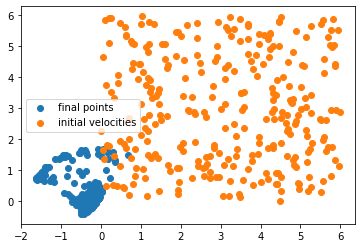

In [71]:
plt.scatter(XF[:,0], XF[:,1], label = 'final points')
plt.scatter (V[:,0], V[:,1], label = 'initial velocities')
plt.legend()

In [73]:
neigh.fit (XF,V)

KNeighborsRegressor(weights='distance')

In [74]:
res = neigh.predict(c1.T).T

In [75]:
res

array([[4.33804587],
       [5.39943273]])

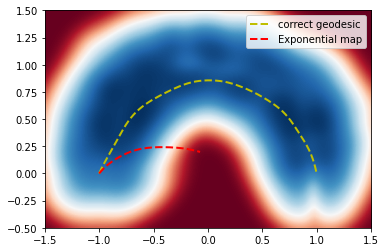

In [76]:
curve_expmap_comb, failed_expmap_comb = geodesics.expmap(manifold, c0, res)


curve_comb, logmap_comb, curve_length_comb, failed_comb, solution_comb \
                = geodesics.compute_geodesic(solver_comb, manifold, c0, c1)

geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='correct geodesic')
utils.plot_measure(manifold, np.linspace(-1.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
plt.axis('image')
# geodesics.plot_curve(curve_comb, c='y', linestyle='--', linewidth=2, label='comb (graph -> bvp)')
geodesics.plot_curve(curve_expmap_comb, c='red', linewidth=2, linestyle='--', label='Exponential map')
plt.legend()